In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Путь к файлу
file_path = "/Users/leonid/scientific_work/data_analysis/Данные/full_data_parsed.csv"


# Загружаем в Pandas
df = pd.read_csv(file_path)
df

,history_id,age,gender,infections,main_disease,analysis_date,csf1_neutrophils,csf1_lymphocytes,glucose_csf,glucose_ratio,...,granular_bodies,albumin_blood,protein_blood,surgery_duration,reoperation_duration,reoperation,sd,liquorrhea,outcome,notes
0,16098/С2023,56,М,1,D35.3 Доброкачественное новообразование кранио...,2023-06-12,43.0,57.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN
1,16098/С2023,56,М,1,D35.3 Доброкачественное новообразование кранио...,2023-06-05,33.0,60.0,4.10,NaN,...,0.0,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN
2,16098/С2023,56,М,1,D35.3 Доброкачественное новообразование кранио...,2023-06-05,33.0,60.0,4.10,NaN,...,0.0,NaN,NaN,NaN,NaN,0,2,NaN,NaN,NaN
3,20743/С2024,55,Ж,1,G50.0 Невралгия тройничного нерва,2024-07-12,83.0,17.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN
4,20743/С2024,55,Ж,1,G50.0 Невралгия тройничного нерва,2024-07-12,83.0,17.0,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,1,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,2136/С2023,54,М,1,"G00.8 1, вызванный другими бактериями",2023-01-27,12.0,85.0,2.48,0.521,...,0.0,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN
917,2136/С2023,54,М,1,"G00.8 1, вызванный другими бактериями",2023-02-02,15.0,83.0,3.11,0.555,...,0.0,42.44,61.77,NaN,NaN,1,1,NaN,NaN,NaN
918,2136/С2023,54,М,1,"G00.8 1, вызванный другими бактериями",2023-02-10,0.0,100.0,3.68,NaN,...,0.0,49.83,67.26,NaN,NaN,1,1,NaN,NaN,NaN
919,2211/С2020,30,Ж,1,D33.3 Доброкачественное новообразование черепн...,2020-02-11,NaN,17.0,3.11,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,NaN,NaN,NaN


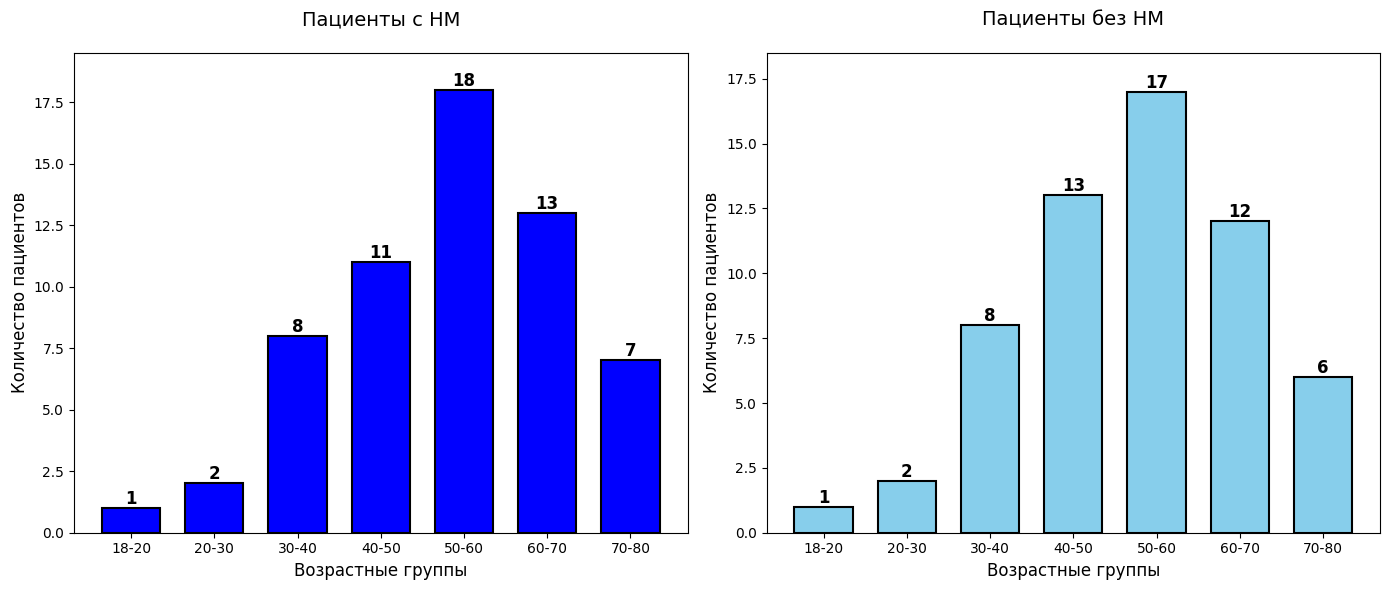

In [18]:
# График распределение по возрастам 
import matplotlib.pyplot as plt

# Определяем возрастные группы с шагом 10 лет начиная с 18
bins = [18] + list(range(20, 90, 10))  
labels = ["18-20"] + [f"{i}-{i+10}" for i in range(20, 80, 10)]

# Функция для группировки данных по возрастным группам
def group_by_age(df):
    df_filtered = df[["history_id", "age"]].drop_duplicates(subset="history_id")
    age_distribution = df_filtered["age"].value_counts().sort_index().reset_index()
    age_distribution.columns = ["age", "count"]

    # Считаем количество пациентов в каждой возрастной группе
    age_groups = {label: 0 for label in labels}
    for age, count in zip(age_distribution["age"], age_distribution["count"]):
        for i in range(len(bins) - 1):
            if bins[i] <= age < bins[i + 1]:  
                age_groups[labels[i]] += count
                break

    # Фильтруем возрастные группы, убирая пустые
    filtered_labels = []
    filtered_counts = []
    for label, count in age_groups.items():
        if count > 0:
            filtered_labels.append(label)
            filtered_counts.append(count)

    return filtered_labels, filtered_counts

# Фильтрация пациентов с НМ (infections == 2)
labels_nm, counts_nm = group_by_age(df[df["infections"] == 2])

# Фильтрация пациентов без НМ (infections == 1)
labels_no_nm, counts_no_nm = group_by_age(df[df["infections"] == 1])

# Создаем фигуру с двумя графиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="white")
plt.subplots_adjust(wspace=0.9)  # Увеличиваем отступ между графиками

# График для пациентов с НМ
axes[0].bar(labels_nm, counts_nm, width=0.7, edgecolor="black", color="blue", linewidth=1.5)
axes[0].set_title("Пациенты с НМ", fontsize=14, pad=20)
axes[0].set_xlabel("Возрастные группы", fontsize=12)
axes[0].set_ylabel("Количество пациентов", fontsize=12)
axes[0].set_xticks(range(len(labels_nm)))  
axes[0].set_xticklabels(labels_nm, fontsize=10)
axes[0].set_ylim(0, max(counts_nm) + 1.5)  

# Добавление подписей над столбцами
for bar, count in zip(axes[0].containers[0], counts_nm):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# График для пациентов без НМ
axes[1].bar(labels_no_nm, counts_no_nm, width=0.7, edgecolor="black", color="#87CEEB", linewidth=1.5)
axes[1].set_title("Пациенты без НМ", fontsize=14, pad=20)
axes[1].set_xlabel("Возрастные группы", fontsize=12)
axes[1].set_ylabel("Количество пациентов", fontsize=12)
axes[1].set_xticks(range(len(labels_no_nm)))  
axes[1].set_xticklabels(labels_no_nm, fontsize=10)
axes[1].set_ylim(0, max(counts_no_nm) + 1.5)  

# Добавление подписей над столбцами
for bar, count in zip(axes[1].containers[0], counts_no_nm):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Убираем сетку
for ax in axes:
    ax.grid(False)

# Показать графики
plt.tight_layout()
plt.show()

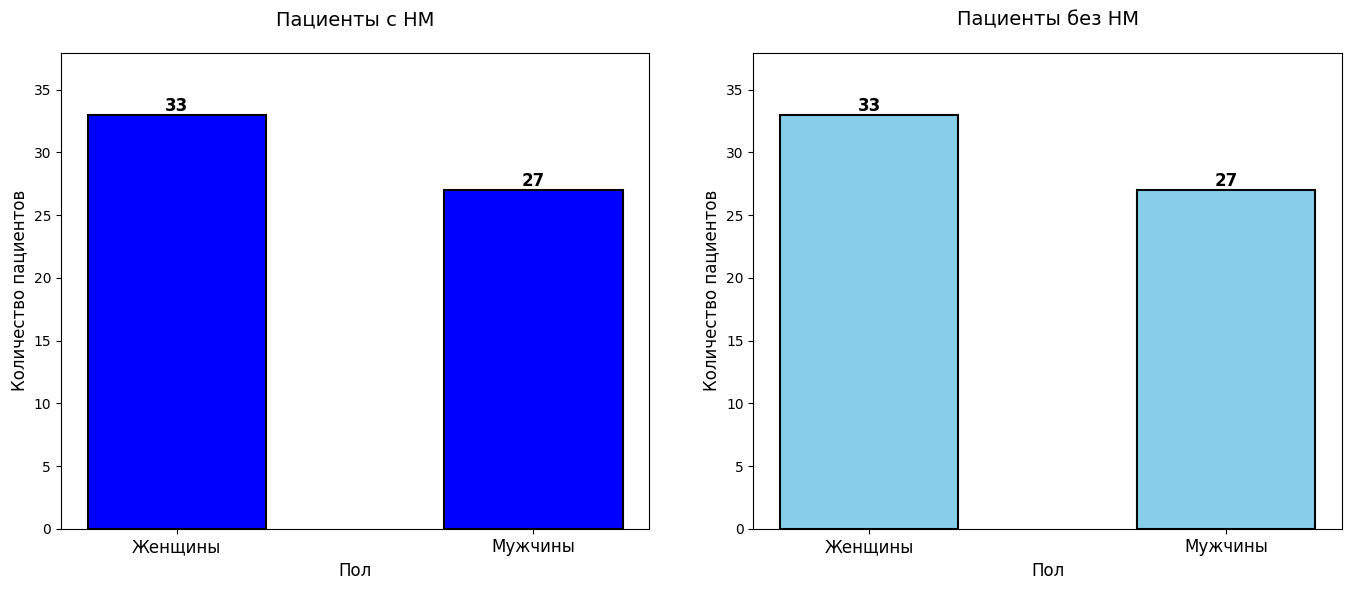

In [ ]:
# График распределение по полу
import matplotlib.pyplot as plt

# Функция для переименования значений в "gender"
def rename_gender(gender):
    return "Мужчины" if gender == "М" else "Женщины" if gender == "Ж" else "Другие"

# Фильтрация пациентов с НМ (infections == 2)
df_nm = df[df["infections"] == 2][["history_id", "gender"]].drop_duplicates(subset="history_id")
df_nm["gender"] = df_nm["gender"].map(rename_gender)

# Фильтрация пациентов без НМ (infections == 1)
df_no_nm = df[df["infections"] == 1][["history_id", "gender"]].drop_duplicates(subset="history_id")
df_no_nm["gender"] = df_no_nm["gender"].map(rename_gender)

# Группировка по "gender" для пациентов с НМ
gender_distribution_nm = df_nm["gender"].value_counts().reset_index()
gender_distribution_nm.columns = ["gender", "count"]

# Группировка по "gender" для пациентов без НМ
gender_distribution_no_nm = df_no_nm["gender"].value_counts().reset_index()
gender_distribution_no_nm.columns = ["gender", "count"]

# Данные для графиков
labels_nm = gender_distribution_nm["gender"]
counts_nm = gender_distribution_nm["count"]

labels_no_nm = gender_distribution_no_nm["gender"]
counts_no_nm = gender_distribution_no_nm["count"]

# Создаем фигуру с двумя графиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="white")
plt.subplots_adjust(wspace=55.9)  # Увеличиваем отступ между графиками

# График для пациентов с НМ
axes[0].bar(labels_nm, counts_nm, width=0.5, edgecolor="black", color="blue", linewidth=1.5)
axes[0].set_title("Пациенты с НМ", fontsize=14, pad=20)
axes[0].set_xlabel("Пол", fontsize=12)
axes[0].set_ylabel("Количество пациентов", fontsize=12)
axes[0].set_xticks(range(len(labels_nm)))  
axes[0].set_xticklabels(labels_nm, fontsize=12)
axes[0].set_ylim(0, max(counts_nm) * 1.15)  # Добавляем запас по Y

# Добавление подписей над столбцами
for bar, count in zip(axes[0].containers[0], counts_nm):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# График для пациентов без НМ
axes[1].bar(labels_no_nm, counts_no_nm, width=0.5, edgecolor="black", color="#87CEEB", linewidth=1.5)
axes[1].set_title("Пациенты без НМ", fontsize=14, pad=20)
axes[1].set_xlabel("Пол", fontsize=12)
axes[1].set_ylabel("Количество пациентов", fontsize=12)
axes[1].set_xticks(range(len(labels_no_nm)))  
axes[1].set_xticklabels(labels_no_nm, fontsize=12)
axes[1].set_ylim(0, max(counts_no_nm) * 1.15)  # Добавляем запас по Y

# Добавление подписей над столбцами
for bar, count in zip(axes[1].containers[0], counts_no_nm):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Убираем сетку
for ax in axes:
    ax.grid(False)

# Показать графики
plt.tight_layout()
plt.show()

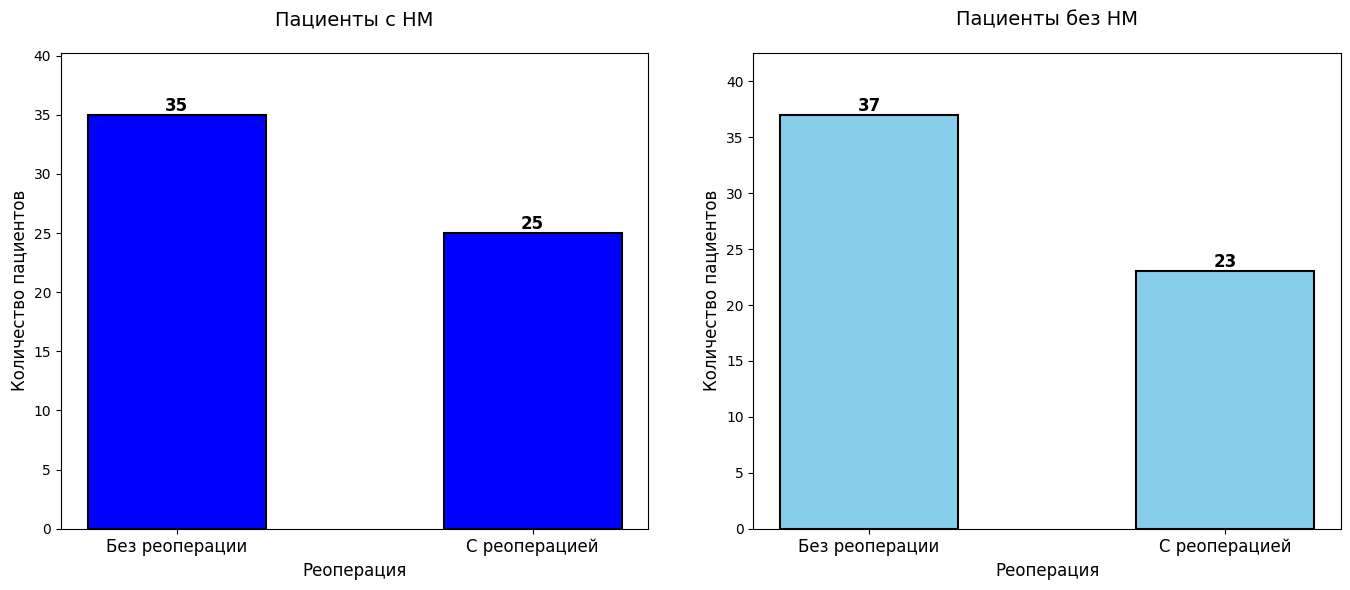

In [ ]:
# График распределение по наличию реоперации 
import matplotlib.pyplot as plt

# Функция для переименования значений в "reoperation"
def rename_oper(reoperation):
    return "Без реоперации" if reoperation == 0 else "С реоперацией" if reoperation == 1 else "Нет данных"

# Фильтрация пациентов с НМ (infections == 2)
df_nm = df[df["infections"] == 2][["history_id", "reoperation"]].drop_duplicates(subset="history_id")
df_nm["reoperation"] = df_nm["reoperation"].map(rename_oper)

# Фильтрация пациентов без НМ (infections == 1)
df_no_nm = df[df["infections"] == 1][["history_id", "reoperation"]].drop_duplicates(subset="history_id")
df_no_nm["reoperation"] = df_no_nm["reoperation"].map(rename_oper)

# Группировка по "reoperation" для пациентов с НМ
oper_distribution_nm = df_nm["reoperation"].value_counts().reset_index()
oper_distribution_nm.columns = ["reoperation", "count"]

# Группировка по "reoperation" для пациентов без НМ
oper_distribution_no_nm = df_no_nm["reoperation"].value_counts().reset_index()
oper_distribution_no_nm.columns = ["reoperation", "count"]

# Данные для графиков
labels_nm = oper_distribution_nm["reoperation"]
counts_nm = oper_distribution_nm["count"]

labels_no_nm = oper_distribution_no_nm["reoperation"]
counts_no_nm = oper_distribution_no_nm["count"]

# Создаем фигуру с двумя графиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="white")
plt.subplots_adjust(wspace=5.9)  # Увеличиваем отступ между графиками

# График для пациентов с НМ
axes[0].bar(labels_nm, counts_nm, width=0.5, edgecolor="black", color="blue", linewidth=1.5)
axes[0].set_title("Пациенты с НМ", fontsize=14, pad=20)
axes[0].set_xlabel("Реоперация", fontsize=12)
axes[0].set_ylabel("Количество пациентов", fontsize=12)
axes[0].set_xticks(range(len(labels_nm)))  
axes[0].set_xticklabels(labels_nm, fontsize=12)
axes[0].set_ylim(0, max(counts_nm) * 1.15)  # Добавляем запас по Y

# Добавление подписей над столбцами
for bar, count in zip(axes[0].containers[0], counts_nm):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# График для пациентов без НМ
axes[1].bar(labels_no_nm, counts_no_nm, width=0.5, edgecolor="black", color="#87CEEB", linewidth=1.5)
axes[1].set_title("Пациенты без НМ", fontsize=14, pad=20)
axes[1].set_xlabel("Реоперация", fontsize=12)
axes[1].set_ylabel("Количество пациентов", fontsize=12)
axes[1].set_xticks(range(len(labels_no_nm)))  
axes[1].set_xticklabels(labels_no_nm, fontsize=12)
axes[1].set_ylim(0, max(counts_no_nm) * 1.15)  # Добавляем запас по Y

# Добавление подписей над столбцами
for bar, count in zip(axes[1].containers[0], counts_no_nm):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Убираем сетку
for ax in axes:
    ax.grid(False)

# Показать графики
plt.tight_layout()
plt.show()

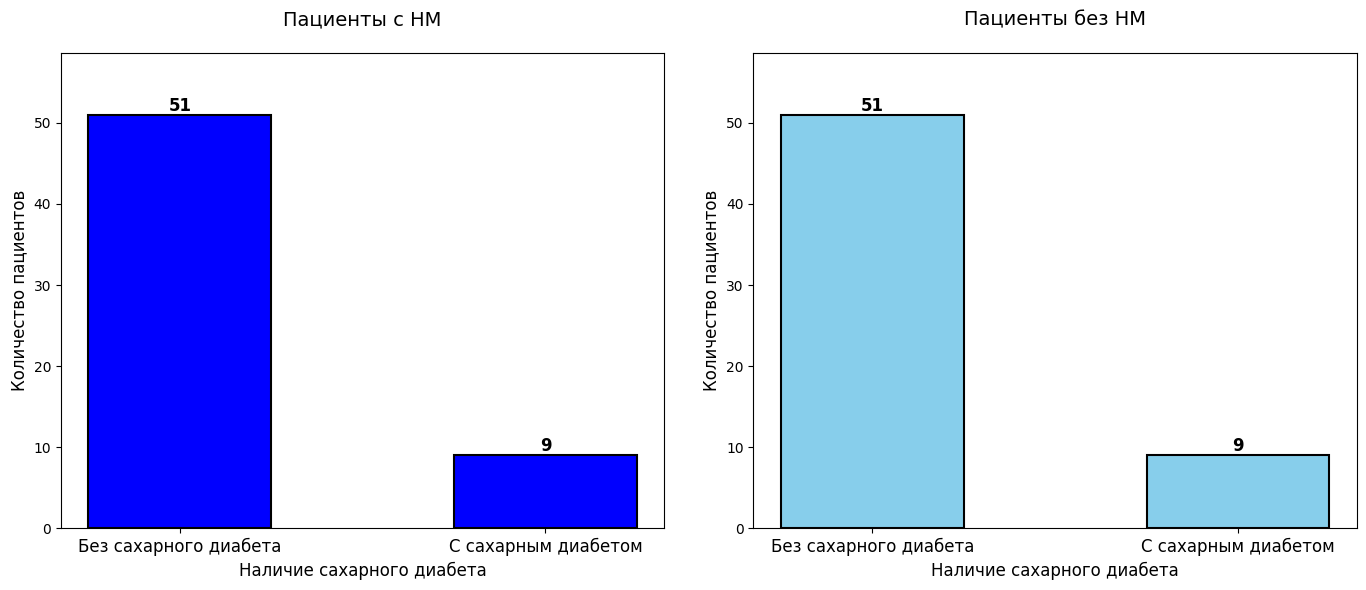

In [ ]:
# График распределение по наличию СД
import matplotlib.pyplot as plt

# Функция для переименования значений в "sd"
def rename_sd(sd):
    return "С сахарным диабетом" if sd == 2 else "Без сахарного диабета" if sd == 1 else "Нет данных"

# Фильтрация пациентов с НМ (infections == 2)
df_nm = df[df["infections"] == 2][["history_id", "sd"]].drop_duplicates(subset="history_id")
df_nm["sd"] = df_nm["sd"].map(rename_sd)

# Фильтрация пациентов без НМ (infections != 2)
df_no_nm = df[df["infections"] == 1][["history_id", "sd"]].drop_duplicates(subset="history_id")
df_no_nm["sd"] = df_no_nm["sd"].map(rename_sd)

# Группировка по "sd" для пациентов с НМ
sd_distribution_nm = df_nm["sd"].value_counts().reset_index()
sd_distribution_nm.columns = ["sd", "count"]

# Группировка по "sd" для пациентов без НМ
sd_distribution_no_nm = df_no_nm["sd"].value_counts().reset_index()
sd_distribution_no_nm.columns = ["sd", "count"]

# Данные для графиков
labels_nm = sd_distribution_nm["sd"]
counts_nm = sd_distribution_nm["count"]

labels_no_nm = sd_distribution_no_nm["sd"]
counts_no_nm = sd_distribution_no_nm["count"]

# Создаем фигуру с двумя графиками
fig, axes = plt.subplots(1, 2, figsize=(14, 6), facecolor="white")
plt.subplots_adjust(wspace=0.9)  # Увеличиваем отступ между графиками
# Устанавливаем метки на оси X и Y  для первого графика
axes[0].set_xticks(range(len(labels_nm)))  
axes[0].set_xticklabels(labels_nm, fontsize=12)
axes[0].set_ylim(0, max(counts_nm) * 1.15)

# Устанавливаем метки на оси X и Y для второго графика
axes[1].set_xticks(range(len(labels_no_nm)))  
axes[1].set_xticklabels(labels_no_nm, fontsize=12)
axes[1].set_ylim(0, max(counts_no_nm) * 1.15)

# График для пациентов с НМ
axes[0].bar(labels_nm, counts_nm, width=0.5, edgecolor="black", color="blue", linewidth=1.5)
axes[0].set_title("Пациенты с НМ", fontsize=14, pad=20)
axes[0].set_xlabel("Наличие сахарного диабета", fontsize=12)
axes[0].set_ylabel("Количество пациентов", fontsize=12)
axes[0].set_xticklabels(labels_nm, fontsize=12)

# Добавление подписей над столбцами
for bar, count in zip(axes[0].containers[0], counts_nm):
    axes[0].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# График для пациентов без НМ
axes[1].bar(labels_no_nm, counts_no_nm, width=0.5, edgecolor="black", color="#87CEEB", linewidth=1.5)
axes[1].set_title("Пациенты без НМ", fontsize=14, pad=20)
axes[1].set_xlabel("Наличие сахарного диабета", fontsize=12)
axes[1].set_ylabel("Количество пациентов", fontsize=12)
axes[1].set_xticklabels(labels_no_nm, fontsize=12)

# Добавление подписей над столбцами
for bar, count in zip(axes[1].containers[0], counts_no_nm):
    axes[1].text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
                 ha='center', va='bottom', fontsize=12, fontweight='bold')

# Убираем сетку
for ax in axes:
    ax.grid(False)

# Показать графики
plt.tight_layout()
plt.show()

### Графики на всякий случай

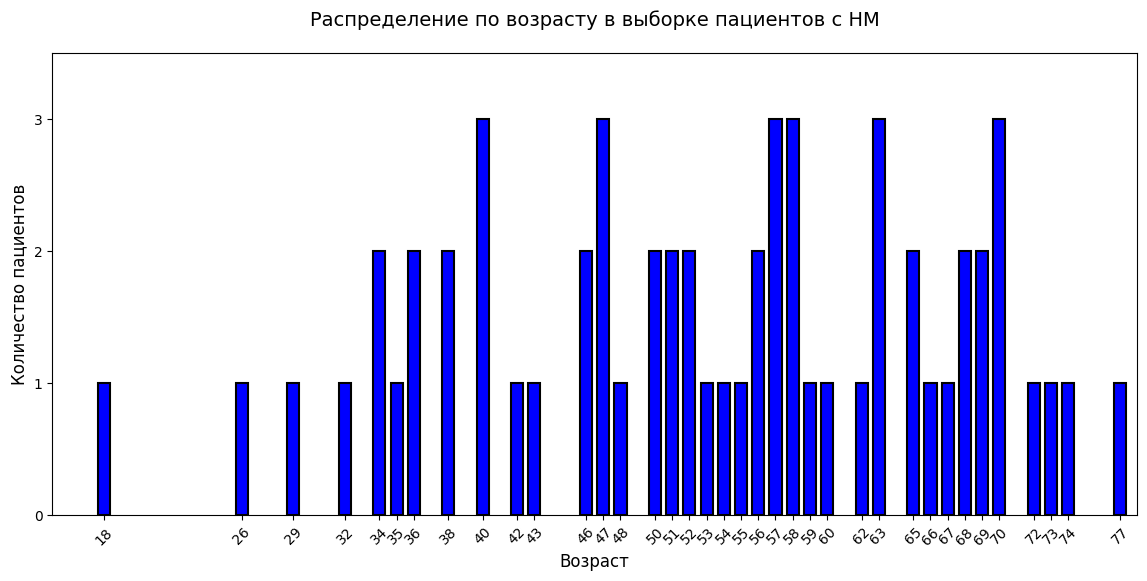

In [19]:
import matplotlib.pyplot as plt

# Группируем данные по возрасту и считаем количество пациентов в каждой возрастной группе
df_filtered = df[["history_id", "infections","age"]]  # Оставляем только нужные столбцы
df_filtered = df_filtered[df_filtered["infections"] == 2]  # Фильтруем инфекции = 2
df_filtered = df_filtered.drop_duplicates()  # Удаляем повторяющиеся строки

# Группируем по возрасту и считаем количество вхождений
age_distribution = df_filtered["age"].value_counts().sort_index().reset_index()

# Данные для графика
ages = age_distribution["age"]  # Уникальные значения возраста
patient_counts = age_distribution["count"]   # Количество пациентов для каждого возраста

# Создание фигуры и фона
plt.figure(figsize=(14, 6), facecolor='white')  # Белый фон и увеличение ширины

# Построение диаграммы с синими столбцами и четкими границами
plt.bar(ages, patient_counts, width=0.7, edgecolor='black', color='blue', linewidth=1.5)

# Настройка оси X (возраст) - подписи под наклоном 45 градусов
plt.xticks(ages, fontsize=10, rotation=45)

# Настройка оси Y (количество пациентов) - шаг 1, от 0 до 3
plt.yticks(range(0, 4, 1), fontsize=10)
plt.ylim(0, 3.5)  # Ограничение по Y до 3

# Ограничение оси X, чтобы избежать лишнего пространства слева
plt.xlim(15, max(ages) + 1)

# Убираем пунктирные линии сетки
plt.grid(False)

# Подписи
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Количество пациентов", fontsize=12)
plt.title("Распределение по возрасту в выборке пациентов с НМ", fontsize=14, pad=20)  # Увеличенный отступ заголовка

# Показать график
plt.show()

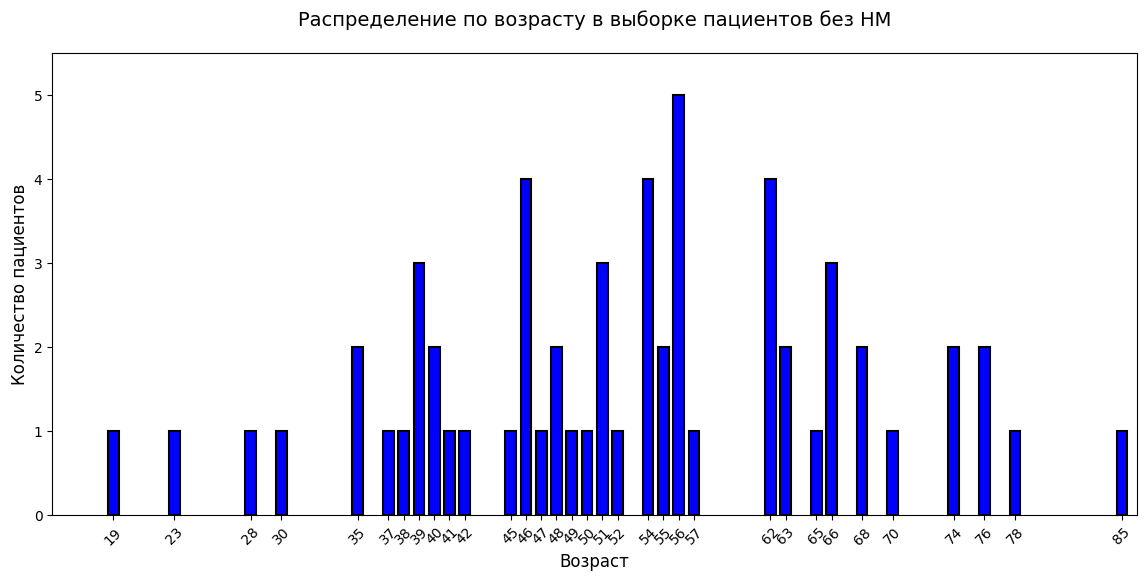

In [ ]:
# График распределение по возрастам подробный
import matplotlib.pyplot as plt

# Группируем данные по возрасту и считаем количество пациентов в каждой возрастной группе
df_filtered = df[["history_id", "infections","age"]]  # Оставляем только нужные столбцы
df_filtered = df_filtered[df_filtered["infections"] == 1]  # Фильтруем инфекции = 2
df_filtered = df_filtered.drop_duplicates()  # Удаляем повторяющиеся строки

# Группируем по возрасту и считаем количество вхождений
age_distribution = df_filtered["age"].value_counts().sort_index().reset_index()

# Данные для графика
ages = age_distribution["age"]  # Уникальные значения возраста
patient_counts = age_distribution["count"]   # Количество пациентов для каждого возраста

# Создание фигуры и фона
plt.figure(figsize=(14, 6), facecolor='white')  # Белый фон и увеличение ширины

# Построение диаграммы с синими столбцами и четкими границами
plt.bar(ages, patient_counts, width=0.7, edgecolor='black', color='blue', linewidth=1.5)

# Настройка оси X (возраст) - подписи под наклоном 45 градусов
plt.xticks(ages, fontsize=10, rotation=45)

# Настройка оси Y (количество пациентов) - шаг 1, от 0 до 3
plt.yticks(range(0, 6, 1), fontsize=10)
plt.ylim(0, 5.5)  # Ограничение по Y до 3

# Ограничение оси X, чтобы избежать лишнего пространства слева
plt.xlim(15, max(ages) + 1)

# Убираем пунктирные линии сетки
plt.grid(False)

# Подписи
plt.xlabel("Возраст", fontsize=12)
plt.ylabel("Количество пациентов", fontsize=12)
plt.title("Распределение по возрасту в выборке пациентов без НМ", fontsize=14, pad=20)  # Увеличенный отступ заголовка

# Показать график
plt.show()

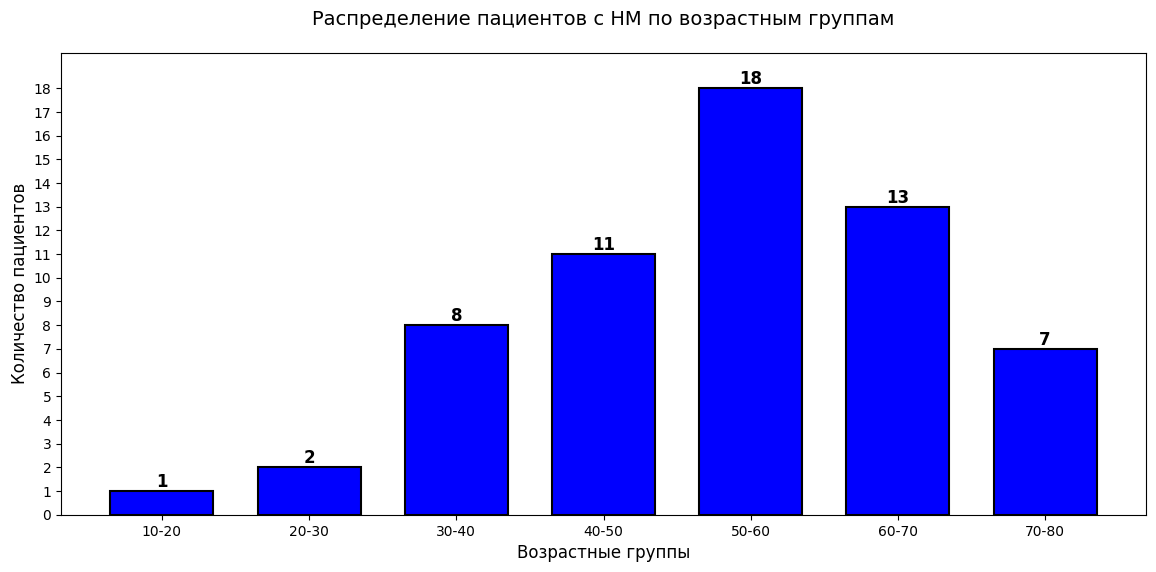

In [ ]:
# График распределение по возрастам старый
import matplotlib.pyplot as plt

# Определяем возрастные группы с шагом 10 лет
bins = range(10, 90, 10)  
labels = [f"{i}-{i+10}" for i in bins[:-1]]

# Группируем данные по возрасту и считаем количество пациентов в каждой возрастной группе
df_filtered = df[["history_id", "infections","age"]]  # Оставляем только нужные столбцы
df_filtered = df_filtered[df_filtered["infections"] == 2]  # Фильтруем инфекции = 2
df_filtered = df_filtered.drop_duplicates()  # Удаляем повторяющиеся строки

# Группируем по возрасту и считаем количество вхождений
age_distribution = df_filtered["age"].value_counts().sort_index().reset_index()
# Данные для графика
ages = age_distribution["age"]  # Уникальные значения возраста
patient_counts = age_distribution["count"]   # Количество пациентов для каждого возраста
# Считаем количество пациентов в каждой возрастной группе
age_groups = {label: 0 for label in labels}
for age, count in zip(ages, patient_counts):
    for i in range(len(bins) - 1):
        if bins[i] <= age < bins[i + 1]:  # Проверяем, в какой интервал попадает возраст
            age_groups[labels[i]] += count
            break

# Фильтруем возрастные группы, убирая те, где количество пациентов = 0
filtered_labels = []
filtered_counts = []

for label, count in age_groups.items():
    if count > 0:
        filtered_labels.append(label)
        filtered_counts.append(count)

# Построение диаграммы
plt.figure(figsize=(14, 6), facecolor='white')  # Белый фон и увеличение ширины

# Столбчатая диаграмма
bars = plt.bar(filtered_labels, filtered_counts, width=0.7, edgecolor='black', color='blue', linewidth=1.5)

# Добавление подписей над столбцами (количество пациентов)
for bar, count in zip(bars, filtered_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count), 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Настройка оси X (возрастные группы)
plt.xticks(fontsize=10)

# Настройка оси Y (количество пациентов) - шаг 1, ограничение сверху на основе данных
plt.yticks(range(0, max(filtered_counts) + 1, 1), fontsize=10)
plt.ylim(0, max(filtered_counts) + 1.5)

# Убираем пунктирные линии сетки
plt.grid(False)

# Подписи
plt.xlabel("Возрастные группы", fontsize=12)
plt.ylabel("Количество пациентов", fontsize=12)
plt.title("Распределение пациентов с НМ по возрастным группам", fontsize=14, pad=20)

# Показать график
plt.show()